
# Table Of Contents

* [Problem Statement](#sectionone)
* [Loading Data](#sectiontwo)
* [EDA](#sectionthree)
    - [Data Info](#sectionthree-one)
    - [Data Description](#sectionthree-two)
    - [Data Type Categorization](#sectionthree-three)
    - [Distribution Of Each Numeric Attribute](#sectionthree-four)
    - [Distribution Of Each String Attribute](#sectionthree-five)
    - [Year Wise Sales Growth](#sectionthree-six)
    - [Year Built Wise Sale Growth](#section-seven)
    - [Missing Value Count](#sectionthree-eight)
    - [PairPlot for Numeric Attributes](#sectionthree-nine)
    - [Correlation Matrix](#sectionthree-ten)
* [Feature Engineering](#sectionfour)
    - [Imputation](#sectionfour-one)
    - [Feature Engineering - Year Data](#sectionfour-two)
    - [Log Transformation](#sectionfour-three)
    - [Feature Engineering - Numerical Encoded Data](#sectionfour-four)
* [Model Selection](#sectionfive)
* [Training](#sectionsix)
* [Model Evaluation](#sectionseven)
* [Test Data Preparation & Prediction](#sectioneight)

<a id='sectionone'></a>
# Problem Statement

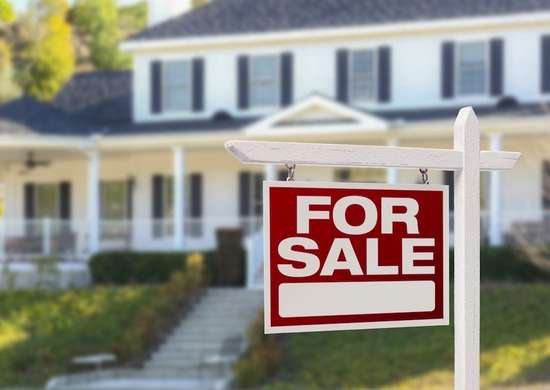

🏡 **Predicting House Prices in Ames, Iowa: A Regression Challenge**

**Objective:** Predict house prices based on 79 detailed variables describing residential homes.

**Key Focus: Advanced Regression Techniques**

**Approach:**
- Leverage Feature Engineering for enhanced predictive power.
- Implement state-of-the-art regression algorithms:

   1. **Random Forest**
      - Ensemble method utilizing multiple decision trees.
      - Robust to overfitting; captures intricate relationships.

   2. **Gradient Boosting**
      - Sequential ensemble method building trees iteratively.
      - Corrects errors of preceding trees; yields high accuracy.

🚀 **Competition Expectations:**
- Utilize advanced regression methodologies.
- Emphasize feature engineering for optimal results.


# Loading Data

In [1]:
from pathlib import Path

directory_path = '/kaggle/input'
file_paths = [str(path) for path in Path(directory_path).rglob('*') if path.is_file()]

for file_path in file_paths:
    print(file_path)

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

<a id='sectionthree'></a>
# EDA

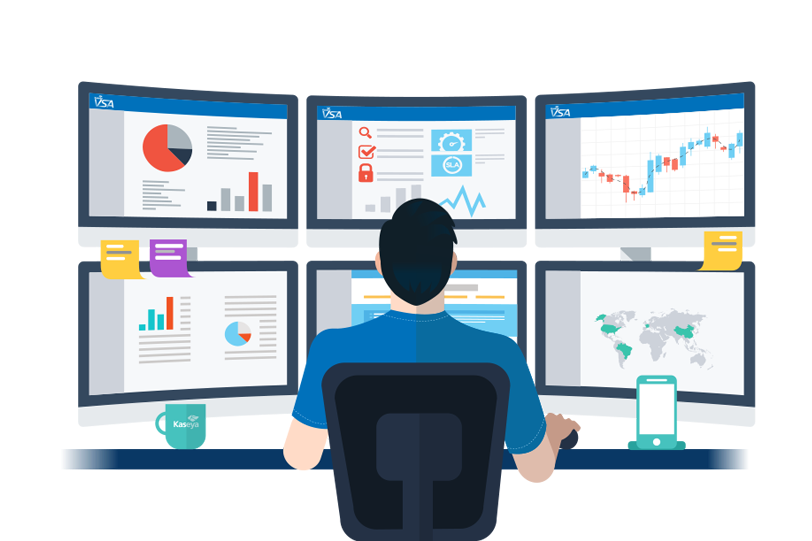

🔍 **Exploratory Data Analysis (EDA): Unveiling Data Insights**

**Definition:**
**Exploratory Data Analysis** is a pivotal process involving in-depth investigations of data. Its aims are to:
- Discover patterns
- Identify anomalies
- Test hypotheses
- Validate assumptions

**Objective:**
In this phase, our focus is on delving into the dataset to:
- Uncover hidden patterns
- Detect anomalies
- Assess the data's behavior concerning its labels

<a id='sectionthree-one'></a>
## Data Info

The `df_train.info()` method is commonly used in the context of working with pandas DataFrames in Python. It provides concise information about the DataFrame, including the data types of each column, the number of non-null values, and memory usage.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<b>Oservation</b>

There are 37 Numerical Features and 43 Objects.
There are multiple features which has missing values

<a id='sectionthree-two'></a>
## Data Description

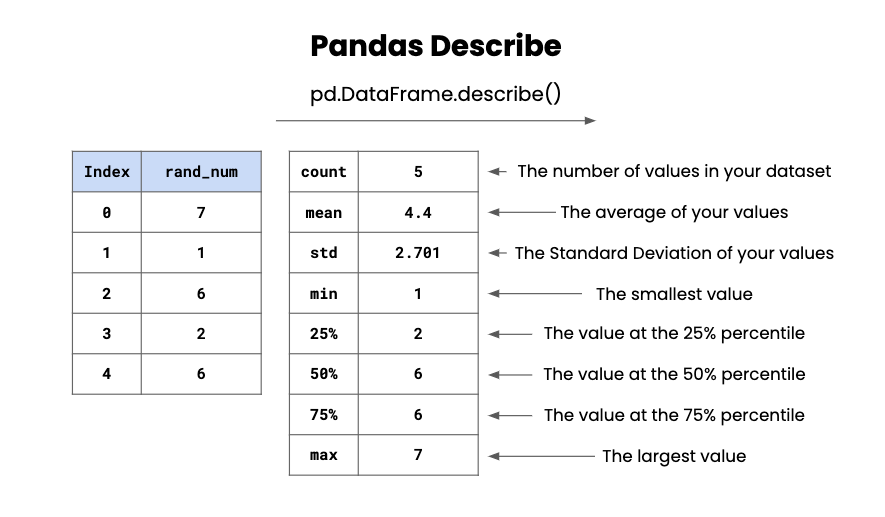

In [4]:

df_train = df_train.drop('Id', axis=1)

# Describe the DataFrame and apply styling
styled_df = df_train.describe().style \
    .set_properties(**{'background-color': 'black',
                       'color': 'lawngreen',
                       'border-color': 'white',
                       'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'darkorange'), ('color', 'black')]
    }, {
        'selector': 'td',
        'props': [('background-color', 'darkslategrey'), ('color', 'white')]
    }])

# Display the styled DataFrame
styled_df


<a id='sectionthree-three'></a>
## Data Type Categorization

In [5]:
numeric_cols = df_train.select_dtypes(include=['number']).columns.tolist()
string_cols = df_train.select_dtypes(include=['object']).columns.tolist()

In [6]:
import plotly.express as px
import cufflinks as cf
import pandas as pd

# Assuming df_train, numeric_cols, and string_cols are defined
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Count the number of numeric and string columns
num_numeric = len(numeric_cols)
num_string = len(string_cols)

# Create a DataFrame for the pie chart
pie_df = pd.DataFrame({
    "category": ["Numeric", "String"],
    "values": [num_numeric / (num_numeric + num_string) * 100, num_string / (num_numeric + num_string) * 100]
})

# Create a pie chart using Plotly Express
fig = px.pie(pie_df, values='values', names='category', color_discrete_sequence=px.colors.sequential.RdBu)

# Show the pie chart
fig.show()


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



<a id='sectionthree-four'></a>
## Distribution Of Each Numeric Attributes 

In [7]:
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Assuming numeric_cols is defined
for column in numeric_cols:
    df_train[column].iplot(
        kind='hist',
        xTitle=column,
        linecolor='black',
        yTitle='Count',
        title=f'{column} Distribution',
        bins=20,
        theme='white',
        opacity=0.7,
        colors=['#3498db'],  # Change the color to your preference
        fill=True,
        histnorm='percent',  # Display as percentage
        bargap=0.05,  # Adjust the gap between bars
        margin=dict(l=30, r=10, t=40, b=30),  # Adjust margins
    )

<b> Observations </b>

All the attributes are series in nature.
We also have Month encoded as interger and Year as numerical feature

Year related attributes:

    1. MoSold: Month Sold (MM)
    2. YrSold: Year Sold (YYYY)
    3. YearBuilt: Original construction date
    4. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    5. GarageYrBlt: Year garage was built

<br>
Numerical Encoded Attributes

1. MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

2.OverallQual: Rates the overall material and finish of the house
    
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

3.OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

<div>

<a id='sectionthree-five'></a>
## Distribution Of Each String Attributes

In [8]:
import cufflinks as cf

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Assuming string_cols is defined
for column in string_cols:
    df_train[column].value_counts().iplot(
        kind='bar',
        xTitle=column,
        linecolor='black',
        yTitle='Count',
        title=f'{column} Distribution',
        colors=['#3498db'],  # Change the color to your preference
        bargap=0.1,  # Adjust the gap between bars
        theme='white',
        margin=dict(l=30, r=10, t=40, b=30)  # Adjust margins
    )


<b> Observation </b>
All the String Attributes are Categorical in Nature which can be engineered so that we can use for training .

List of popular Encoding Menthods:

    1. Label Encoding
    2. OneHot Encoding
    
Any of the above can be use which is subject to performance and Accuracy

<a id='sectionthree-six'></a>
## Year Wise Sales Growth

In [9]:
import plotly.graph_objects as go

# Create a horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=df_train['YrSold'],
    x=df_train['SalePrice'],
    orientation='h',
    marker=dict(color='#3498db', line=dict(color='black', width=1)),
    text=df_train['SalePrice'],
    hoverinfo='text'
))

# Layout customization
fig.update_layout(
    title='Year Wise Sales',
    xaxis_title='Sales',
    yaxis_title='Year',
    template='plotly_white',
    plot_bgcolor='#ecf0f1'  # Light blue background
)

# Show the chart
fig.show()


<a id='sectionthree-seven'></a>
## Year Built Wise Sales Growth

In [10]:
import plotly.graph_objects as go

# Create a bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_train['YearBuilt'],
    y=df_train['SalePrice'],
    marker=dict(color='#3498db', line=dict(color='black', width=1)),
    text=df_train['SalePrice'],
    hoverinfo='text'
))

# Layout customization
fig.update_layout(
    title='Year Built Wise Sales',
    xaxis_title='Year Built',
    yaxis_title='Sale Price',
    template='plotly_white',
    plot_bgcolor='#ecf0f1'  # Light blue background
)

# Show the chart
fig.show()


<a id='sectionthree-eight'></a>
## Missing Value Count

In [11]:
import plotly.graph_objects as go

# Create a bar chart for missing values
fig = go.Figure()

null_df = pd.DataFrame(df_train.isnull().sum()).reset_index()
null_values_df = null_df[null_df[0] > 0]

fig.add_trace(go.Bar(
    x=null_values_df['index'],
    y=null_values_df[0],
    marker=dict(color='#3498db', line=dict(color='black', width=1)),
    text=null_values_df[0],
    hoverinfo='text'
))

# Layout customization
fig.update_layout(
    title='Missing Values in Each Attribute',
    xaxis_title='Attribute',
    yaxis_title='Count of Missing Value',
    template='plotly_white',
    plot_bgcolor='#ecf0f1'  # Light blue background
)

# Show the chart
fig.show()


<b> Observation</b>

Multiple Attributes have Missing values which needs to be taken care of in Feature Engineering Section.

We have Total Missing Valus count : 19<br>
<br>
Lising Attributes:

'LotFrontage'<br>
'Alley'<br>
'MasVnrType'<br>
'MasVnrArea'<br>
'BsmtQual'<br>
'BsmtCond'<br>
'BsmtExposure'<br>
'BsmtFinType1'<br>
'BsmtFinType2'<br>
'Electrical'<br>
'FireplaceQu'<br>
'GarageType'<br>
'GarageYrBlt'<br>
'GarageFinish'<br>
'GarageQual'<br>
'GarageCond'<br>
'PoolQC'<br>
'Fence'<br>
'MiscFeature'<br>

<a id='sectionthree-nine'></a>
## PairPlot for Numeric Attributes

In [12]:
import plotly.express as px

# Specify the numeric columns to include in the scatter matrix
numeric_columns = df_train.select_dtypes(include='number').columns

# Create a scatter matrix plot
fig = px.scatter_matrix(df_train[numeric_columns], width=5000, height=5000)

# Customize the layout
fig.update_layout(
    title='Scatter Matrix for Numeric Columns',
    template='plotly_white',
    plot_bgcolor='#ecf0f1',  # Light blue background
)

# Rotate x-axis tick labels for better readability
fig.update_xaxes(tickangle=90)

# Show the plot
fig.show()


<a id='sectionthree-ten'></a>
## Correaltion Matrix

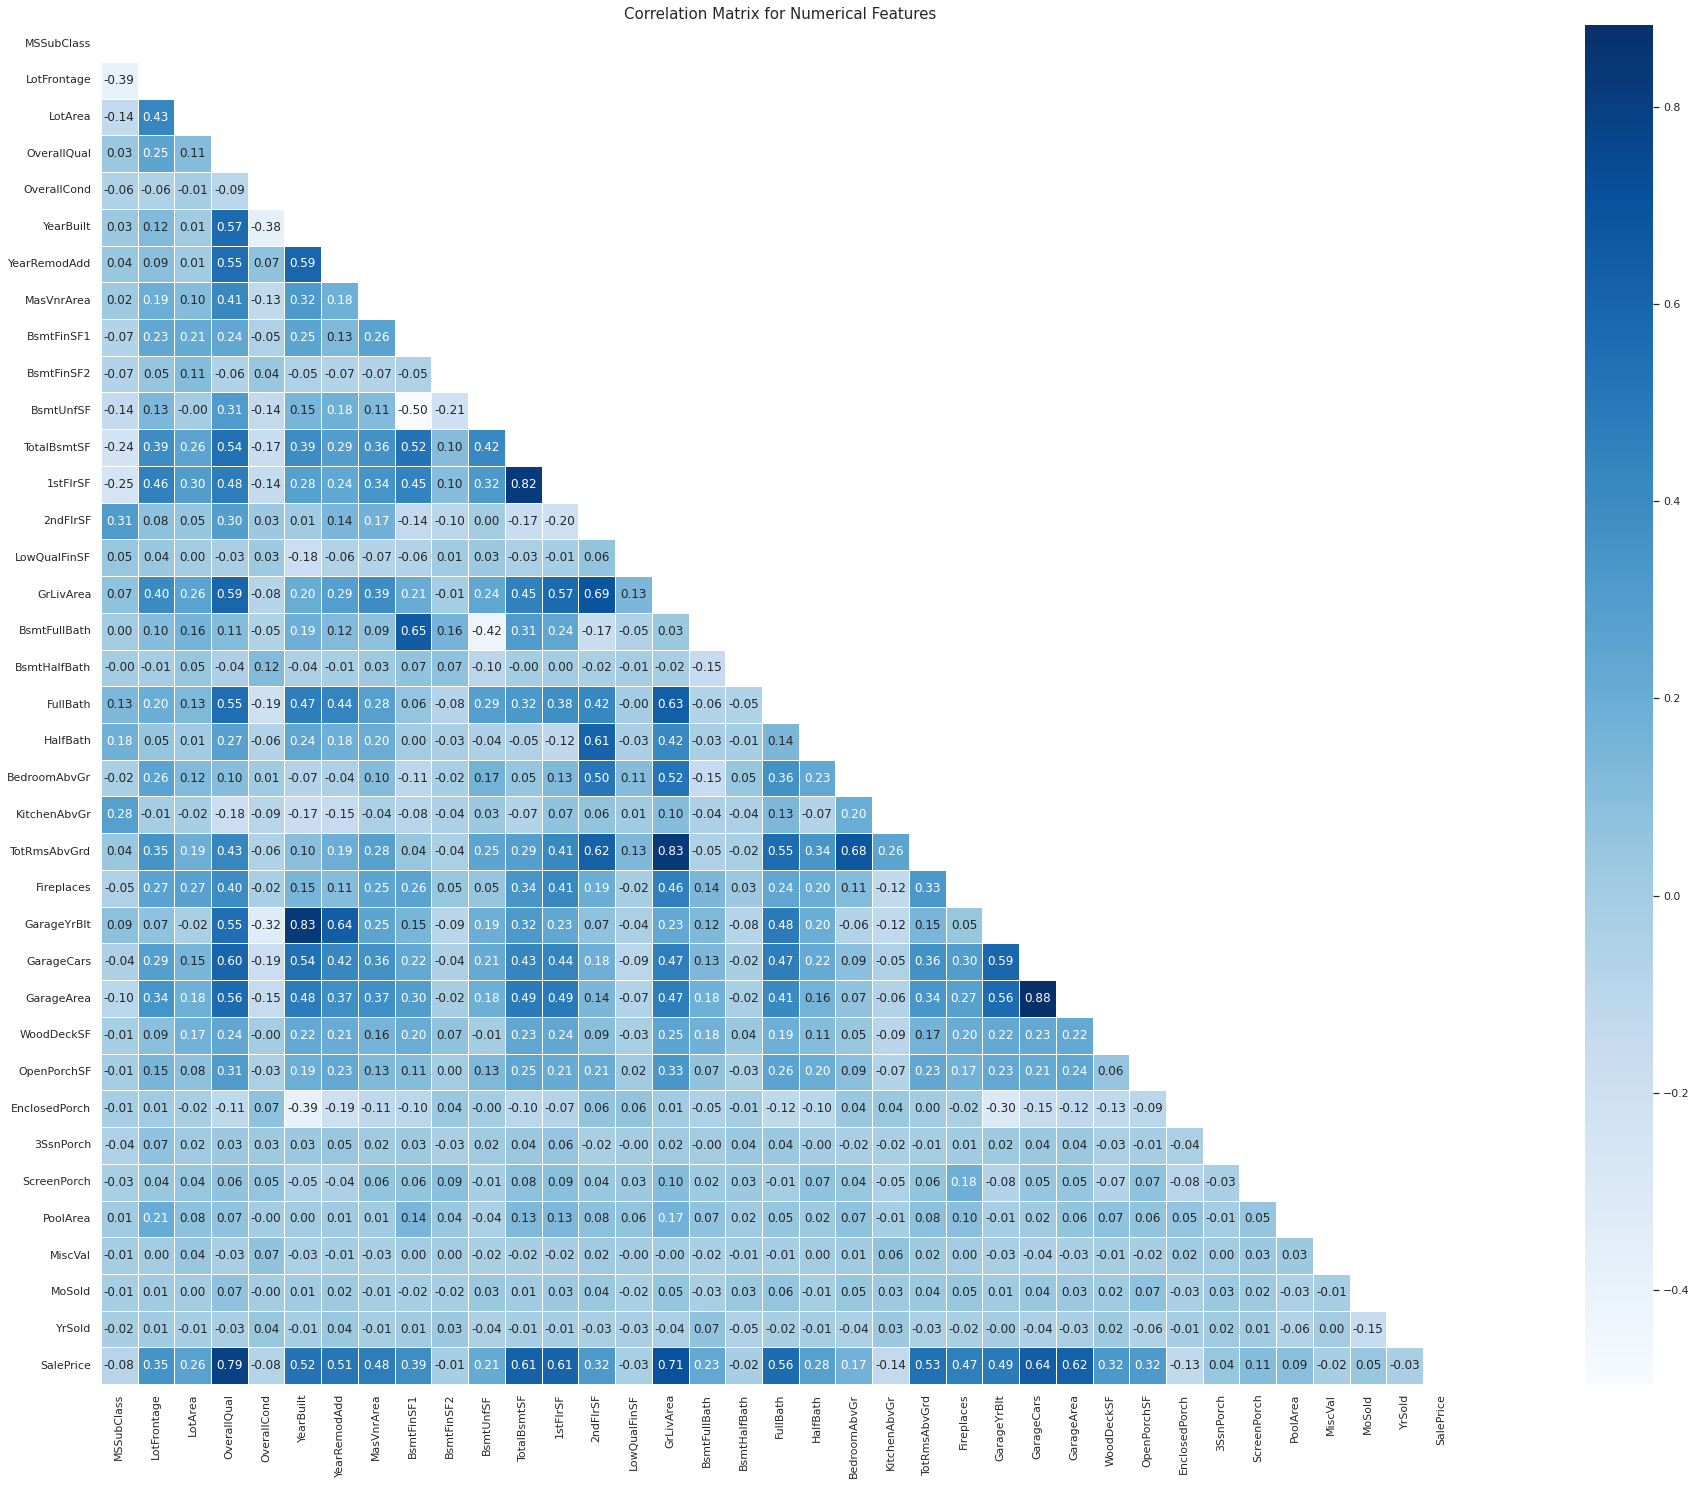

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Correlation Matrix for numerical features
sns.set_theme(style="whitegrid")  # Changed to whitegrid for better visibility
fig, ax = plt.subplots(figsize=(45, 25))  # Adjusted the figure size for better fit

# Generate a correlation matrix
corr = df_train[numeric_columns].corr()

# Create a mask to hide the upper triangle for better readability
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
sns.heatmap(corr, annot=True, square=True, mask=mask, cmap="Blues", linewidths=0.5, fmt=".2f", ax=ax)

# Customize plot labels and title
ax.set_title('Correlation Matrix for Numerical Features', size=15)
plt.show()


<a id='sectionfour'></a>
# Feature Engineering

**Feature Engineering** is a very important step in machine learning. Feature engineering refers to the process of designing artificial features into an algorithm. These artificial features are then used by that algorithm in order to improve its performance, or in other words reap better results. Data scientists spend most of their time with data, and it becomes important to make models accurate.

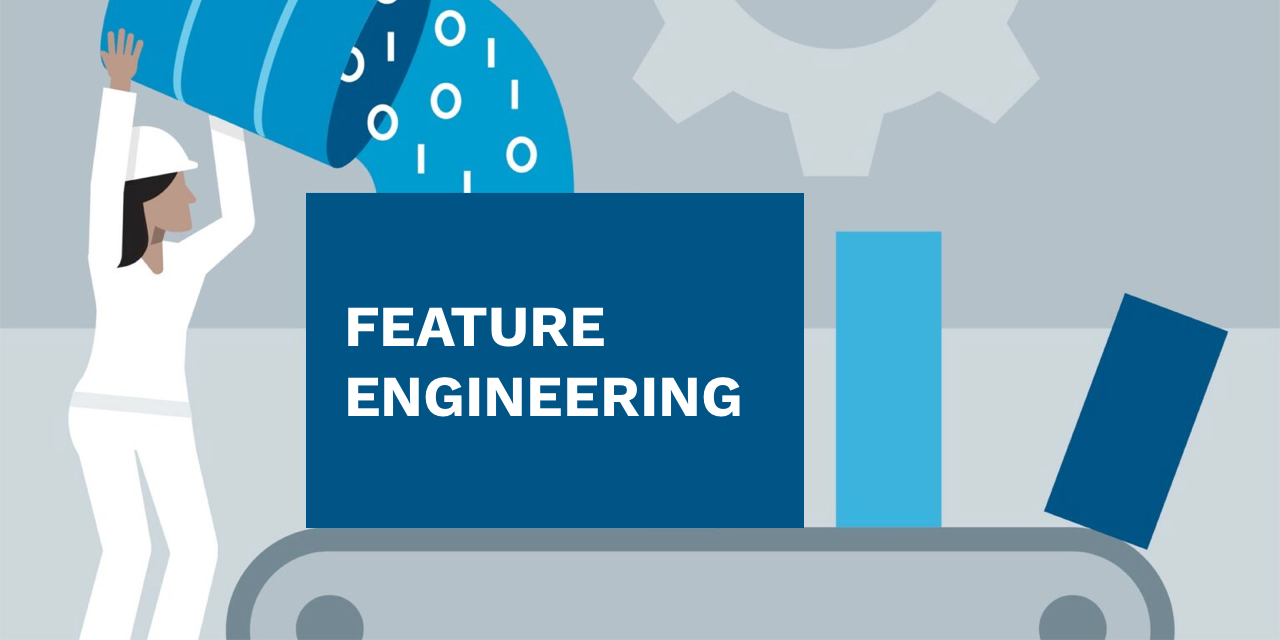

<a id='sectionfour-one'></a>
## Imputation

In statistics, **Imputation** is the process of replacing missing data with substituted values. When substituting for a data point, it is known as "unit imputation"; when substituting for a component of a data point, it is known as "item imputation". There are three main problems that missing data causes: missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency.Because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values. That is to say, when one or more values are missing for a case, most statistical packages default to discarding any case that has a missing value, which may introduce bias or affect the representativeness of the results. Imputation preserves all cases by replacing missing data with an estimated value based on other available information. Once all missing values have been imputed, the data set can then be analysed using standard techniques for complete data.There have been many theories embraced by scientists to account for missing data but the majority of them introduce bias. A few of the well known attempts to deal with missing data include: hot deck and cold deck imputation; listwise and pairwise deletion; mean imputation; non-negative matrix factorization; regression imputation; last observation carried forward; stochastic imputation; and multiple imputation.

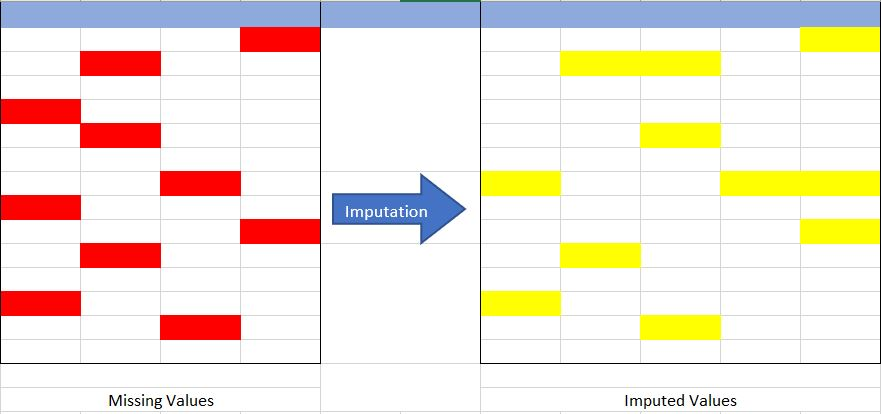

In [14]:
f"Currently Total columns where missing value exist: {(df_train.isnull().sum()>0).sum()}"

'Currently Total columns where missing value exist: 19'

Checkinng for missing value percentage in each columns

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate missing values
total_missing = df_train.isnull().sum().sort_values(ascending=False)
percentage_missing = (df_train.isnull().sum() / len(df_train)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percentage_missing], axis=1, keys=['Total', 'Percentage'])

# Display the top 20 entries with enhanced styling
missing_data_head = missing_data.head(20)

# Use a custom color palette
colors = sns.light_palette("orange", as_cmap=True)

styled_missing_data = missing_data_head.style.background_gradient(cmap=colors, subset=['Percentage']) \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'black'), ('color', 'lawngreen')]}]) \
    .set_properties(**{'border-color': 'white'})

# Display the styled missing data table
styled_missing_data

Basic Imputation Strategy:

1. If Attributes are Numerical Feature then Imputation should be mean.<br>
2. If Attributes are of Categorical data then imputation should be mode.<br>

In [16]:
from sklearn.impute import SimpleImputer

cat_feat = ['GarageFinish', 'GarageQual', 'GarageCond', 'MSZoning','Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'KitchenQual', 'LotFrontage']
num_feat = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2','BsmtFinSF1']

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_train[num_feat] = imp_mean.fit_transform(df_train[num_feat].astype(int))
df_train[cat_feat] = imp_mode.fit_transform(df_train[cat_feat].astype(str))

test_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
test_mean = SimpleImputer(missing_values= np.nan, strategy = 'mean')

df_test[cat_feat] = test_mode.fit_transform(df_test[cat_feat])
df_test[num_feat] = test_mean.fit_transform(df_test[num_feat])

Creating an aggregate measure for total baths involves summing up the values of all baths, factoring in their availability ratios. For instance:

- **Half Bath:** Counted as Half Bath * 0.5
- **Three-Fourths Bath:** Counted as Three-Fourths Bath * (3/4)

This approach ensures a comprehensive and weighted representation of different bath types in the overall total baths calculation.

In [17]:
df_train['Bath_total'] = df_train['FullBath'] + 0.5*df_train['HalfBath'] + df_train['BsmtFullBath'] + 0.5*df_train['BsmtHalfBath']
df_test['Bath_total'] = df_test['FullBath'] + 0.5*df_test['HalfBath'] + df_test['BsmtFullBath'] + 0.5*df_test['BsmtHalfBath']

Creating consolidated basement values involves aggregating and combining information from various basement-related columns. The process typically includes summing up basement areas or counts to form new comprehensive metrics. For example, you might:

- **Total Basement Finished Area:** Summing up the finished areas from `BsmtFinSF1` and `BsmtFinSF2`.
  
- **Total Basement Unfinished Area:** Summing up the unfinished area from `BsmtUnfSF`.

- **Total Basement Area:** Combining both finished and unfinished areas.

This approach allows for a unified representation of basement characteristics, offering a more holistic perspective on the property's basement-related features.

In [18]:
df_train['BsmtFinSF'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] - df_train['BsmtUnfSF']
df_test['BsmtFinSF'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] - df_test['BsmtUnfSF']

Consolidating porch-related data involves combining information from various porch-related columns to create new, comprehensive metrics. Here are some examples:

1. **Total Porch Area:**
   - Summing up the areas of different porch types, such as `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, and `ScreenPorch`.

2. **Has Porch (Binary):**
   - Creating a binary indicator to represent whether a house has any porch or not. It could be based on the total porch area or the presence of any porch type.

By generating these new porch-related metrics, you can create a more inclusive and informative representation of the property's porch features.

In [19]:
# 1. Total Porch Area:
df_train['Porch'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_test['Porch'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']

# 2. Has Porch (Binary):
df_train['HasPorch'] = ((df_train['OpenPorchSF'] > 0) | 
                        (df_train['EnclosedPorch'] > 0) | 
                        (df_train['3SsnPorch'] > 0) | 
                        (df_train['ScreenPorch'] > 0)).astype(int)

df_test['HasPorch'] = ((df_test['OpenPorchSF'] > 0) | 
                        (df_test['EnclosedPorch'] > 0) | 
                        (df_test['3SsnPorch'] > 0) | 
                        (df_test['ScreenPorch'] > 0)).astype(int)

Crafting the ultimate Finished Square Footage (Finsf) dataset involves the artful combination of noteworthy features while carefully subtracting any contributions from less desirable elements. This process entails summing up the areas of the high-quality components and subtracting the areas associated with those of lower quality. In essence, it's about distilling the essence of premium space while filtering out less favorable aspects to create a refined and comprehensive representation of finished square footage.

In [20]:
df_train['FinSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] - df_train['LowQualFinSF']
df_test['FinSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] - df_test['LowQualFinSF']

<b>Has Pool:</b>

Create a binary feature indicating whether the house has a pool.


In [21]:
df_train['HasPool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['HasPool'] = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

<b>Month Sold Seasonality:</b>

Explore seasonality in house sales by extracting information from the MoSold column.

In [22]:
df_train['MonthSold_Sin'] = np.sin(2 * np.pi * df_train['MoSold'] / 12)
df_train['MonthSold_Cos'] = np.cos(2 * np.pi * df_train['MoSold'] / 12)

df_test['MonthSold_Sin'] = np.sin(2 * np.pi * df_test['MoSold'] / 12)
df_test['MonthSold_Cos'] = np.cos(2 * np.pi * df_test['MoSold'] / 12)

In [23]:
import plotly.express as px
import numpy as np

# Assuming df_train is your DataFrame

# Create new features for month sold seasonality
df_train['MonthSold_Sin'] = np.sin(2 * np.pi * df_train['MoSold'] / 12)
df_train['MonthSold_Cos'] = np.cos(2 * np.pi * df_train['MoSold'] / 12)

# Plot Month Sold Seasonality
fig = px.scatter(df_train, x='MonthSold_Sin', y='MonthSold_Cos', color='MoSold', 
                 title='Month Sold Seasonality', labels={'MonthSold_Sin': 'Month Sold (Sin)',
                                                          'MonthSold_Cos': 'Month Sold (Cos)'},
                 template='plotly_white',  # White theme
                 width=800, height=600)

# Display the plot
fig.show()


Columns that we do not need anymore

In [24]:
columns_to_drop = ['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal',
                'Alley', 'Fence', 'WoodDeckSF','FireplaceQu',
                'Fireplaces', 'MasVnrType', 'MasVnrArea',
                'FullBath', 'HalfBath' , 'BsmtFullBath' ,
                'BsmtHalfBath','BsmtFinSF1' , 'BsmtFinSF2' ,
                'BsmtUnfSF', 'OpenPorchSF', 'EnclosedPorch',
                '3SsnPorch', 'ScreenPorch',
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']

df_train = df_train.drop(columns_to_drop, axis = 1)
df_test = df_test.drop(columns_to_drop, axis = 1)

In [25]:
# df_train.isnull().sum()
(df_train.isnull().sum()).sort_values(ascending=False)

GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
                 ..
ExterQual         0
ExterCond         0
Foundation        0
MSZoning          0
MonthSold_Cos     0
Length: 63, dtype: int64

Replacing These Columns Null value with None

    ['GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','Electrical']


In [26]:
None_Columns = ['GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','Electrical']
df_train[None_Columns] = df_train.loc[:,None_Columns].replace(to_replace = np.nan, value = "None", inplace = False)
df_test[None_Columns] = df_test.loc[:,None_Columns].replace(to_replace = np.nan, value = "None", inplace = False)

Replacing Null year Column (GarageYrBlt) with value : 0

In [27]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(0)

In [28]:
f"After Imputation missing value exist: {(df_train.isnull().sum()>0).sum()}"

'After Imputation missing value exist: 0'

<a id='sectionfour-two'></a>
## Feature Engineering - Year Data

List of Year Attributes we have :<br>
1. YrSold: Year Sold (YYYY)<br>
2. YearBuilt: Original construction date<br>
3. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)<br>
4. GarageYrBlt: Year garage was built<br>
        
Transformation:
<br>
year = |year/5| * 5

In [29]:
from datetime import datetime
year_col = ['YrSold','YearBuilt','YearRemodAdd', 'GarageYrBlt']

for col in year_col:
    df_train[col]  =  round(df_train[col]/5)*5
    df_test[col]  =  round(df_test[col]/5)*5

<a id='sectionfour-three'></a>
## Log Transformation

The **log transformation** stands out as a widely embraced technique in the repertoire of transformations aimed at reshaping skewed data to closely align with normality. When the original data adheres to a log-normal distribution or exhibits characteristics akin to it, the log transformation gracefully molds the data into a distribution that approaches normality or closely mirrors its symmetrical counterpart. This transformative approach plays a pivotal role in enhancing the interpretability and modeling accuracy of the data, making it a cornerstone in the toolkit of data analysts and statisticians.

List of detected `Skewed` data:
<br>
None

Embracing the Logarithmic Shift:

Indulging in the transformative prowess of logarithms:
`x=log(x)`

This succinct expression encapsulates the log transformation's ability to harmonize with data, offering a nuanced perspective that can unveil hidden patterns and foster a more conducive environment for analysis and modeling.

Since after More improved Feature engineering Noe more attributes exist with Skewed Data

<a id='sectionfour-four'></a>
## Feature Engineering - Numerical Encoded Data

**One hot encoding & Label Encoding** can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.

In [30]:
df_train['LotFrontage'] = df_train['LotFrontage'].astype(float)
df_test['LotFrontage'] = df_test['LotFrontage'].astype(float)

In [31]:
object_columns = []
for i in range(len(df_train.columns)):
    if df_train[df_train.columns.tolist()[i]].dtypes == 'O':
        object_columns.append(df_train.columns.tolist()[i])
print(f"Total Object Columns Length: {len(object_columns)}")

Total Object Columns Length: 37


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
heads = df_train.columns
for i in range(len(df_train.columns)):
    if df_train[heads[i]].dtypes == 'O':
        lb_make.fit(df_train[heads[i]].astype(str))
        df_train[heads[i]] = lb_make.transform(df_train[heads[i]].astype(str))
        
lb_test = LabelEncoder()
heads_test = df_test.columns
for i in range(len(df_test.columns)):
    if df_test[heads_test[i]].dtypes == 'O':
        lb_test.fit(df_test[heads_test[i]].astype(str))
        df_test[heads_test[i]] = lb_test.transform(df_test[heads_test[i]].astype(str))
        

In [33]:
Y = df_train['SalePrice']
X = df_train[list(set(df_train.columns.tolist())-{'Id', 'SalePrice'})]
X_test =df_test[list(set(df_test.columns.tolist())-{'Id'})]

In [34]:
# Function to apply styling
def style_df(df):
    return df.style.set_table_styles([
        {'selector': 'thead',
         'props': [('background-color', '#3498db'), ('color', 'white')]},
        {'selector': 'tbody',
         'props': [('background-color', 'white'), ('color', '#3498db')]},
        {'selector': 'th',
         'props': [('text-align', 'center')]},
        {'selector': 'td',
         'props': [('text-align', 'center')]}
    ])

# Apply styling
styled_df = style_df(X.head())

# Display the styled DataFrame
styled_df


In [35]:
# Apply styling
styled_df_test = style_df(X_test.head())

# Display the styled DataFrame
styled_df_test

In [36]:
feature_x, feature_y = X, Y

<a id='sectionfour-five'></a>
## Scaling

**Scaling** is transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are.

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(feature_x)
feature_x = sc.transform(feature_x)
feature_x_test = sc.transform(X_test)

<a id='sectionfive'></a>
# Model Selection

The Model selection is a important part because based on cases and scenarios some ML model will work and some will not, so each model need to to be observed how it is behaving with the provided data and with certain parameters.

This process gets easy with **LazyPredict** support module in python, which is what is going to be used for this case.

## LazyPredict

In [38]:
!pip install lazypredict

In [39]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np

X, y = shuffle(feature_x, feature_y, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 19%|█▉        | 8/42 [00:00<00:02, 13.10it/s]

ElasticNetCV model failed to execute
Gram matrix passed in via 'precompute' parameter did not pass validation when a single element was checked - please check that it was computed properly. For element (31,32) we computed -37.08831024169922 but the user-supplied value was -37.0883903503418.


 50%|█████     | 21/42 [00:04<00:02,  7.57it/s]

LassoCV model failed to execute
Gram matrix passed in via 'precompute' parameter did not pass validation when a single element was checked - please check that it was computed properly. For element (31,32) we computed -37.08831024169922 but the user-supplied value was -37.0883903503418.


100%|██████████| 42/42 [00:53<00:00,  1.29s/it]


In [40]:
models.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})

<a id='sectionsix'></a>
# Training

## LGBMRegressor

In [41]:
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
clf = LGBMRegressor()
score = cross_val_score(clf, feature_x, feature_y, cv=cv)

<a id='sectionseven'></a>
# Model Evaluation

In [42]:
print(f"Score Mean: {score.mean()}, Score Std: {score.std()}")

Score Mean: 0.864230913139161, Score Std: 0.02980847759650874


<a id='sectioneight'></a>
# Test Data Preparation & Predictions 

In [43]:

clf = LGBMRegressor()

pred = clf.fit(feature_x, feature_y).predict(feature_x_test)

#Submission Using Test
final_df = pd.DataFrame({"Id": df_test.iloc[:,0].tolist(), "SalePrice":pred}).head(10).style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})
final_df

In [44]:
pd.DataFrame({"Id": df_test.iloc[:,0].tolist(), "SalePrice":pred}).to_csv("submission.csv", index=False)